## Library

In [1]:
#!pip install pyforest
# import pyforest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Dataset

In [2]:
dataframe_tr = pd.read_csv('train.csv')
dataframe_ts = pd.read_csv('test.csv')

In [3]:
dataframe_tr.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
dataframe_ts.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
dataframe_tr.keys()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
data_ts = dataframe_ts.copy()

In [7]:
data_ts.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


## Exploratory Data Analysis

In [8]:
dataframe_tr.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
dataframe_ts.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

## Missing Value Treatment

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit_transform(dataframe_tr.iloc[:,9:11])
dataframe_tr.iloc[:,9:11]=imputer.transform(dataframe_tr.iloc[:,9:11])


In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit_transform(dataframe_ts.iloc[:,9:11])
dataframe_ts.iloc[:,9:11]=imputer.transform(dataframe_ts.iloc[:,9:11])

In [12]:
dataframe_ts.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [13]:
dataframe_tr.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# Feature Engineering

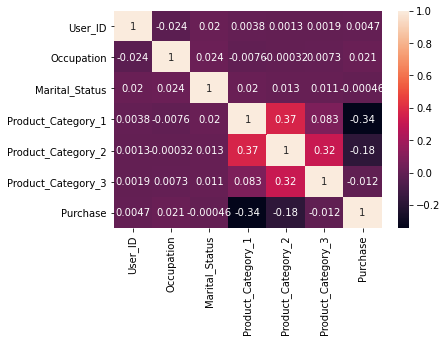

In [16]:
sns.heatmap(dataframe_tr.corr(),annot = True)

In [17]:
dataframe_ts['Occupation'].unique()

array([ 7, 17,  1, 15,  3,  0,  8, 16,  4, 12, 13, 18, 11,  9,  2, 20, 14,
       10,  6, 19,  5], dtype=int64)

## feature reduction 

as we can observ that **User_ID, Product_ID** dont have such importance in further analysis so we can **remove** that column

In [18]:
dataframe_tr.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [19]:
dataframe_ts.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [20]:
dataframe_tr.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,M,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [21]:
dataframe_ts.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,1,11.0,12.669454
1,M,26-35,17,C,0,0,3,5.0,12.669454
2,F,36-45,1,B,4+,1,5,14.0,12.669454
3,F,36-45,1,B,4+,1,4,9.0,12.669454
4,F,26-35,1,C,1,0,4,5.0,12.000000


## Data Cleaning

let us see the dataset info using info() method

In [22]:
dataframe_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [23]:
dataframe_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      233599 non-null  object 
 1   Age                         233599 non-null  object 
 2   Occupation                  233599 non-null  int64  
 3   City_Category               233599 non-null  object 
 4   Stay_In_Current_City_Years  233599 non-null  object 
 5   Marital_Status              233599 non-null  int64  
 6   Product_Category_1          233599 non-null  int64  
 7   Product_Category_2          233599 non-null  float64
 8   Product_Category_3          233599 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 16.0+ MB


now after observing the dataset we can **observe that there are certain column that have incorrect data type** so we have to treat column like **age, Stay_In_Current_City_Years, Product_Category_2, Product_Category_3**

let us use unique() function to see the unique value of the column. 

In [24]:
print(dataframe_tr['Gender'].unique(),'------>train data set')
print(dataframe_ts['Gender'].unique(),'------> test data set')

['F' 'M'] ------>train data set
['M' 'F'] ------> test data set


In [25]:
dataframe_tr['gender']= pd.get_dummies(dataframe_tr['Gender'],drop_first=True)
dataframe_ts['gender']= pd.get_dummies(dataframe_ts['Gender'],drop_first=True)

In [26]:
dataframe_tr['gender'].astype(int)
dataframe_ts['gender'].astype(int)

0         1
1         1
2         0
3         0
4         0
         ..
233594    0
233595    0
233596    0
233597    0
233598    0
Name: gender, Length: 233599, dtype: int32

In [27]:
dataframe_tr['Gender'] = dataframe_tr['gender']
dataframe_ts['Gender'] = dataframe_ts['gender']

In [28]:
print(dataframe_tr['Age'].unique(),'-----> train data set')
print(dataframe_ts['Age'].unique(),'-----> test data set')

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] -----> train data set
['46-50' '26-35' '36-45' '18-25' '51-55' '55+' '0-17'] -----> test data set


In [29]:
def map_age(Age):
  if  Age=='0-17':
    return 0
  elif Age=='18-25':
    return 1
  elif Age=='26-35':
    return 2
  elif Age=='36-45':
    return 3
  elif Age=='46-50':
    return 4
  elif Age=='51-55':
    return 5
  else:
    return 6

dataframe_tr['Age']=dataframe_tr['Age'].apply(map_age)
dataframe_ts['Age']=dataframe_ts['Age'].apply(map_age)

In [30]:
print(dataframe_tr['Stay_In_Current_City_Years'].unique(),'------> train data set')
print(dataframe_ts['Stay_In_Current_City_Years'].unique(),'------> test data set')

['2' '4+' '3' '1' '0'] ------> train data set
['2' '0' '4+' '1' '3'] ------> test data set


In [31]:
dataframe_tr['Stay_In_Current_City_Years'] =dataframe_tr['Stay_In_Current_City_Years'].str.replace('+','')
dataframe_tr['Stay_In_Current_City_Years']=dataframe_tr['Stay_In_Current_City_Years'].astype(int)
dataframe_ts['Stay_In_Current_City_Years'] =dataframe_ts['Stay_In_Current_City_Years'].str.replace('+','')
dataframe_ts['Stay_In_Current_City_Years']=dataframe_ts['Stay_In_Current_City_Years'].astype(int)

In [32]:
print(dataframe_tr['City_Category'].unique(),'------->train data set')
print(dataframe_ts['City_Category'].unique(),'------->test data set')

['A' 'C' 'B'] ------->train data set
['B' 'C' 'A'] ------->test data set


In [33]:
def map_city_categories(City_category):
    if City_category == 'A':
        return 2
    elif City_category == 'B':
        return 1
    else:
        return 0
dataframe_tr['City_Category']=dataframe_tr['City_Category'].apply(map_city_categories)
dataframe_ts['City_Category']=dataframe_ts['City_Category'].apply(map_city_categories)


In [34]:
dataframe_tr['City_Category']

0         2
1         2
2         2
3         2
4         0
         ..
550063    1
550064    0
550065    1
550066    0
550067    1
Name: City_Category, Length: 550068, dtype: int64

In [35]:
dataframe_tr.drop('gender',axis=1,inplace=True)
dataframe_ts.drop('gender',axis=1,inplace=True)

In [36]:
dataframe_tr.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,2,2,0,3,9.842329,12.668243,8370
1,0,0,10,2,2,0,1,6.000000,14.000000,15200
2,0,0,10,2,2,0,12,9.842329,12.668243,1422
3,0,0,10,2,2,0,12,14.000000,12.668243,1057
4,1,6,16,0,4,0,8,9.842329,12.668243,7969


In [37]:
dataframe_ts.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,11.0,12.669454
1,1,2,17,0,0,0,3,5.0,12.669454
2,0,3,1,1,4,1,5,14.0,12.669454
3,0,3,1,1,4,1,4,9.0,12.669454
4,0,2,1,0,1,0,4,5.0,12.000000


In [38]:
dataframe_tr.dtypes

Gender                          uint8
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [39]:
dataframe_ts.dtypes

Gender                          uint8
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

## Now we are set with our data now we can do some visulization on the data 

## Visulization

In [40]:
dataframe_tr.keys()

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

## Univariate analysis

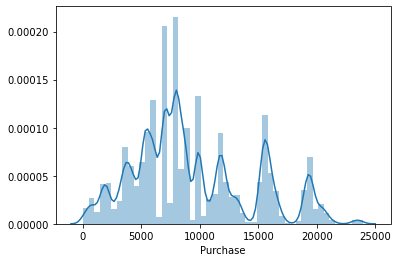

In [41]:
sns.distplot(dataframe_tr['Purchase'])

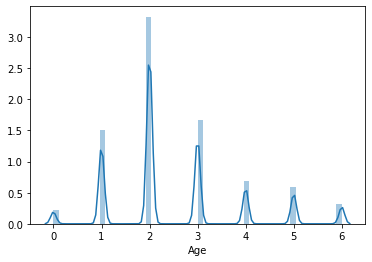

In [42]:
sns.distplot(dataframe_tr['Age'])

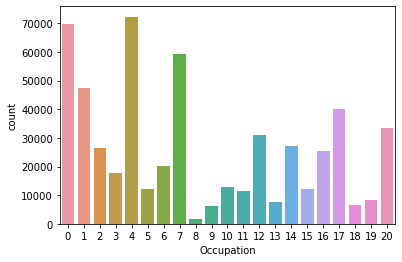

In [43]:
sns.countplot(x='Occupation', data=dataframe_tr)

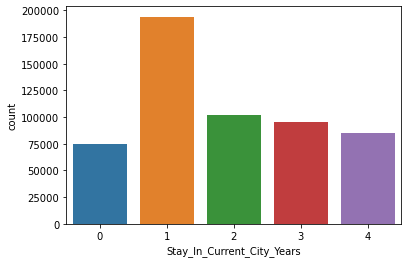

In [44]:
sns.countplot(x='Stay_In_Current_City_Years', data=dataframe_tr)

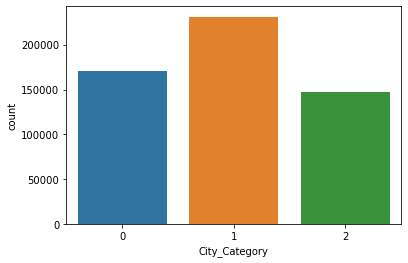

In [45]:
sns.countplot(x='City_Category', data=dataframe_tr)

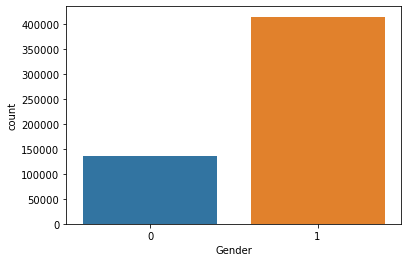

In [46]:
sns.countplot(x='Gender', data=dataframe_tr)

## Bivariate analysis 

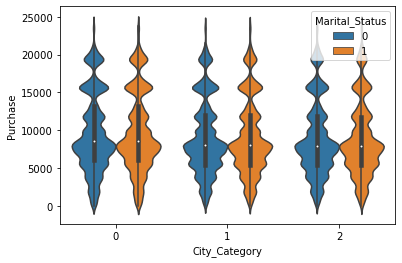

In [47]:
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status',
               data=dataframe_tr)

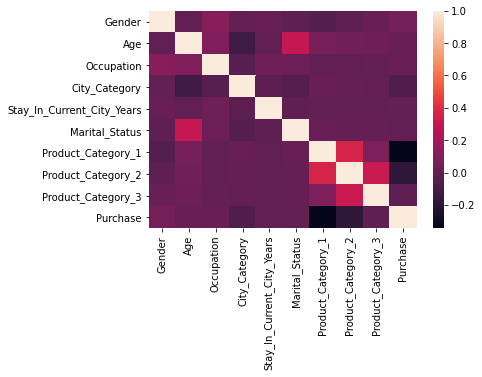

In [50]:
sns.heatmap(dataframe_tr.corr())

**Now we are all set let us move on to machine learning for this data set we are using random forest classifier model**

# Train test split data

In [51]:
x= dataframe_tr.iloc[:,:9]
y= dataframe_tr.iloc[:,9]

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

## Dependenties

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import metrics 

### Feature Scaling

In [54]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Model training

In [55]:
 # let us create random forest regressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

In [56]:
regressor.fit(x_train, y_train) 
y_pred = regressor.predict(x_test)

In [57]:
y_pred

array([13510.50661905, 15008.08195194,  6890.81177922, ...,
       13464.14719048, 14490.63215657,  6096.32842504])

## Model Evaluation

In [58]:
y_test=np.array(y_test)

In [59]:
#  y =sns.lineplot(x = 'y_test',y = 'y_pred')

In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2230.208382621743
Mean Squared Error: 9403858.248282563
Root Mean Squared Error: 3066.5710897160957


In [61]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, y_pred)

In [62]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
# # View accuracy score
# accuracy_score(y_test, y_pred)

In [64]:
# print(classification_report(y_test, y_pred))

In [65]:
# metrics.accuracy_score(y_test,y_pred)

In [66]:
final_pred = regressor.predict(dataframe_ts)

In [67]:
len(final_pred)

233599

In [68]:
len(dataframe_ts)

233599

In [69]:
final_pred

array([13613.22      , 18195.74166667,   479.57333333, ...,
       13111.92      ,   353.80533333,   373.58666667])

In [70]:
df = pd.DataFrame(final_pred)
df

,0
0,13613.220000
1,18195.741667
2,479.573333
3,479.573333
4,373.571667
...,...
233594,169.940000
233595,169.940000
233596,13111.920000
233597,353.805333


In [71]:
y_test

array([19142, 15513,  7802, ..., 11836,  9548,  6888], dtype=int64)

In [72]:
y_pred

array([13510.50661905, 15008.08195194,  6890.81177922, ...,
       13464.14719048, 14490.63215657,  6096.32842504])

In [73]:
from joblib import dump, load
dump(regressor,'blackfriday.joblib')

['blackfriday.joblib']

In [74]:
daf = data_ts

In [75]:
daf['Purchase']= df

In [76]:
daf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,13613.220000
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,18195.741667
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,479.573333
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,479.573333
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,373.571667


In [77]:
daf.drop(['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3'],axis=1,inplace=True)

In [78]:
daf.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,13613.220000
1,1000009,P00113442,18195.741667
2,1000010,P00288442,479.573333
3,1000010,P00145342,479.573333
4,1000011,P00053842,373.571667


In [79]:
daf.to_csv('final_test sheet.csv')